In [1]:
import pandas as pd 
import numpy as np

#Import required Libraries 

Read DataFrame

In [5]:
df1=pd.read_csv("Reveal_EEO1_for_2016.csv")

Explore DataFrame

In [6]:
df1.head()

,company,year,race,gender,job_category,count
0,23andMe,2016,Hispanic_or_Latino,male,Executives,0
1,23andMe,2016,Hispanic_or_Latino,male,Managers,1
2,23andMe,2016,Hispanic_or_Latino,male,Professionals,7
3,23andMe,2016,Hispanic_or_Latino,male,Technicians,0
4,23andMe,2016,Hispanic_or_Latino,male,Sales workers,0


In [8]:
print(df1)

      company  year                race gender          job_category count
0     23andMe  2016  Hispanic_or_Latino   male            Executives     0
1     23andMe  2016  Hispanic_or_Latino   male              Managers     1
2     23andMe  2016  Hispanic_or_Latino   male         Professionals     7
3     23andMe  2016  Hispanic_or_Latino   male           Technicians     0
4     23andMe  2016  Hispanic_or_Latino   male         Sales workers     0
...       ...   ...                 ...    ...                   ...   ...
4495  Sanmina  2016      Overall_totals    NaN  laborers and helpers     4
4496  Sanmina  2016      Overall_totals    NaN       Service workers    57
4497  Sanmina  2016      Overall_totals    NaN                Totals  5205
4498  Sanmina  2016      Overall_totals    NaN       Previous_totals  5615
4499  Sanmina  2016      Overall_totals    NaN              Managers   591

[4500 rows x 6 columns]


In [15]:
df1.describe()

,year,count
count,4500.0,4500.000000
mean,2016.0,493.397778
std,0.0,3284.847663
min,2016.0,0.000000
25%,2016.0,0.000000
50%,2016.0,1.000000
75%,2016.0,38.000000
max,2016.0,77192.000000


# Visualization and EDA

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Prepare data 

In [9]:
df1=df1.replace('na', '0')

In [11]:
df1=df1.fillna({'count':'0'})


In [12]:
df1['count']=df1['count'].astype(int)

In [17]:
print(df1)

      company  year                race gender          job_category  count
0     23andMe  2016  Hispanic_or_Latino   male            Executives      0
1     23andMe  2016  Hispanic_or_Latino   male              Managers      1
2     23andMe  2016  Hispanic_or_Latino   male         Professionals      7
3     23andMe  2016  Hispanic_or_Latino   male           Technicians      0
4     23andMe  2016  Hispanic_or_Latino   male         Sales workers      0
...       ...   ...                 ...    ...                   ...    ...
4495  Sanmina  2016      Overall_totals    NaN  laborers and helpers      4
4496  Sanmina  2016      Overall_totals    NaN       Service workers     57
4497  Sanmina  2016      Overall_totals    NaN                Totals   5205
4498  Sanmina  2016      Overall_totals    NaN       Previous_totals   5615
4499  Sanmina  2016      Overall_totals    NaN              Managers    591

[4500 rows x 6 columns]


In [54]:
df1.tail(500) #We dont want the previous totals

,company,year,race,gender,job_category,count
4000,PayPal,2016,Black_or_African_American,male,Sales workers,26
4001,PayPal,2016,Black_or_African_American,male,Administrative support,181
4002,PayPal,2016,Black_or_African_American,male,Craft workers,0
4003,PayPal,2016,Black_or_African_American,male,operatives,0
4004,PayPal,2016,Black_or_African_American,male,laborers and helpers,0
...,...,...,...,...,...,...
4495,Sanmina,2016,Overall_totals,NaN,laborers and helpers,4
4496,Sanmina,2016,Overall_totals,NaN,Service workers,57
4497,Sanmina,2016,Overall_totals,NaN,Totals,5205
4498,Sanmina,2016,Overall_totals,NaN,Previous_totals,5615


In [18]:
df11=pd.DataFrame(df1[df1['job_category'] != 'Previous_totals'].groupby(['company','job_category','race','gender'])['count'].sum())

In [20]:
print(df11)

                                                                           count
company job_category           race                                gender       
23andMe Administrative support American_Indian_Alaskan_Native      female      1
                                                                   male        0
                               Asian                               female      7
                                                                   male        3
                               Black_or_African_American           female      1
...                                                                          ...
eBay    operatives             Native_Hawaiian_or_Pacific_Islander male        0
                               Two_or_more_races                   female      0
                                                                   male        0
                               White                               female      0
                            

In [21]:
df11=df11.reset_index()
df11=df11.set_index('company')
df11=df11.pivot(columns=['job_category','race','gender'],values='count')


In [22]:
df11.head()

job_category         Administrative support                   \
race         American_Indian_Alaskan_Native       Asian        
gender                               female male female male   
company                                                        
23andMe                                   1    0      7    3   
Adobe                                     0    0     31    8   
Airbnb                                    1    1     18   18   
Apple                                    17   13    498  338   
Cisco                                     0    0     62   20   

job_category                                                         \
race         Black_or_African_American      Hispanic_or_Latino        
gender                          female male             female male   
company                                                               
23andMe                              1    0                  5    0   
Adobe                                5    3                 38    8   
Airbnb                               6    6                 24   15   
Apple                              423  324                666  672   
Cisco                               34    3                104   13   

job_category                                           ...  \
race         Native_Hawaiian_or_Pacific_Islander       ...   
gender                                    female male  ...   
company                                                ...   
23andMe                                        0    0  ...   
Adobe                                          0    3  ...   
Airbnb                                         0    1  ...   
Apple                                         17   25  ...   
Cisco                                          1    2  ...   

job_category                operatives                               \
race         Black_or_African_American      Hispanic_or_Latino        
gender                          female male             female male   
company                                                               
23andMe                              0    0                  0    0   
Adobe                                0    0                  0    0   
Airbnb                               0    0                  0    0   
Apple                                0    0                  0    0   
Cisco                                0    0                  2    6   

job_category                                                                  \
race         Native_Hawaiian_or_Pacific_Islander      Two_or_more_races        
gender                                    female male            female male   
company                                                                        
23andMe                                        0    0                 0    0   
Adobe                                          0    0                 0    0   
Airbnb                                         0    0                 0    0   
Apple                                          0    0                 0    0   
Cisco                                          0    0                 0    0   

job_category              
race          White       
gender       female male  
company                   
23andMe           0    0  
Adobe             0    0  
Airbnb            0    0  
Apple             0    0  
Cisco             0    5  

[5 rows x 154 columns]

In [23]:
df11.tail()

job_category         Administrative support                   \
race         American_Indian_Alaskan_Native       Asian        
gender                               female male female male   
company                                                        
Square                                    0    0     15   20   
Twitter                                   2    0     35    4   
Uber                                      3    1     25   19   
View                                      0    0      1    0   
eBay                                      6    2     44   57   

job_category                                                         \
race         Black_or_African_American      Hispanic_or_Latino        
gender                          female male             female male   
company                                                               
Square                              26   31                 18   23   
Twitter                              3    7                  7    3   
Uber                               102   71                 46   61   
View                                 0    0                  0    0   
eBay                                43   39                 67   71   

job_category                                           ...  \
race         Native_Hawaiian_or_Pacific_Islander       ...   
gender                                    female male  ...   
company                                                ...   
Square                                         0    0  ...   
Twitter                                        0    1  ...   
Uber                                           2    2  ...   
View                                           0    0  ...   
eBay                                          10    3  ...   

job_category                operatives                               \
race         Black_or_African_American      Hispanic_or_Latino        
gender                          female male             female male   
company                                                               
Square                               0    0                  0    0   
Twitter                              0    0                  0    0   
Uber                                 0    0                  0    2   
View                                 4   55                  1    3   
eBay                                 0    0                  0    0   

job_category                                                                  \
race         Native_Hawaiian_or_Pacific_Islander      Two_or_more_races        
gender                                    female male            female male   
company                                                                        
Square                                         0    0                 0    0   
Twitter                                        0    0                 0    0   
Uber                                           0    1                 0    1   
View                                           0    0                 0    3   
eBay                                           0    0                 0    0   

job_category              
race          White       
gender       female male  
company                   
Square            0    0  
Twitter           0    0  
Uber              1   15  
View             12   69  
eBay              0    0  

[5 rows x 154 columns]

In [24]:
df12=df11.sum(level=0,axis=1)
df12.head()

job_category,Administrative support,Craft workers,Executives,Managers,Professionals,Sales workers,Service workers,Technicians,Totals,laborers and helpers,operatives
company,,,,,,,,,,,
23andMe,46,0,17,65,169,0,0,0,297,0,0
Adobe,323,0,93,2448,3028,1270,0,0,7162,0,0
Airbnb,335,0,97,295,1135,0,49,6,1917,0,0
Apple,6887,85,107,8205,23200,21315,418,16975,77192,0,0
Cisco,590,0,307,5609,26661,4312,0,32,37526,0,15


<AxesSubplot:title={'center':'Sort by Total Employees'}, xlabel='company'>

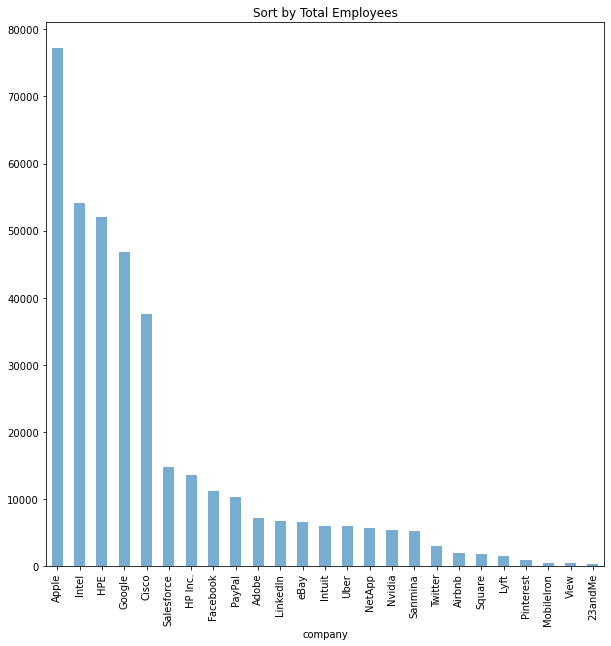

In [25]:
df12['Totals'].sort_values(ascending=False).plot.bar(alpha=0.6, figsize=(10,10), stacked=True,title='Sort by Total Employees')

<AxesSubplot:title={'center':'Job Categories by companies'}, xlabel='company'>

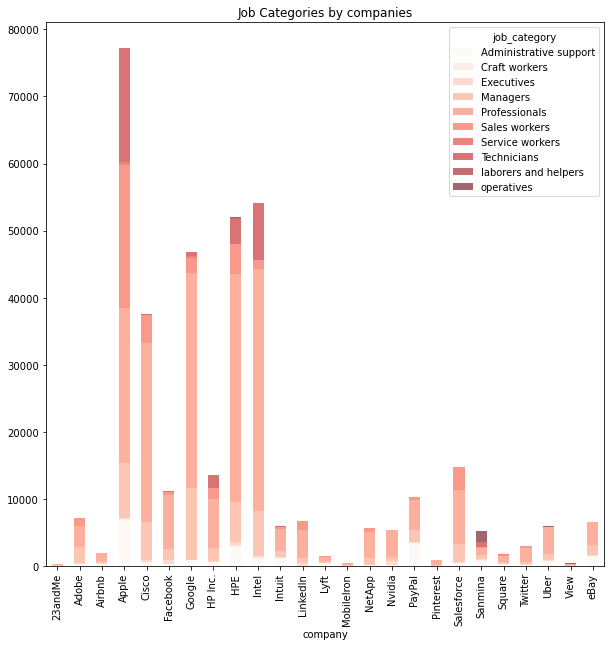

In [26]:
df12.drop('Totals',axis=1).plot.bar(y=['Administrative support', 'Craft workers', 'Executives', 'Managers',
       'Professionals', 'Sales workers', 'Service workers', 'Technicians',
       'laborers and helpers', 'operatives'],alpha=0.6, figsize=(10,10), stacked=True, cmap='Reds',title='Job Categories by companies')

Hypothesis:

Diversity is influenced by not only how many non white and non male employees you have, but also how many non white and non male managers and executives you have. So I try to get features 'white male employees %','white male managers %'and 'white male executives %'.

I try to find the correlation between the numbers of employees and 'white male employees %','white male managers %'and 'white male executives 



In [27]:
idx = pd.IndexSlice
df11['exe_w_male%']=df11.loc[:,idx['Executives','White','male']]/df12.loc[:,'Executives']
df11['mgr_w_male%']=df11.loc[:,idx['Managers','White','male']]/df12.loc[:,'Managers']
df11['Prof%']=df12['Professionals']/df12['Totals']
df11['total_w_male%']=df11.loc[:,idx['Totals','White','male']]/df12['Totals']
df11['Grand_Total']=df12['Totals']
df11['total-exe_w_male%']=df11['exe_w_male%']-df11['total_w_male%']
df11['total-mgr_w_male%']=df11['mgr_w_male%']-df11['total_w_male%']
df11.head()

job_category         Administrative support                   \
race         American_Indian_Alaskan_Native       Asian        
gender                               female male female male   
company                                                        
23andMe                                   1    0      7    3   
Adobe                                     0    0     31    8   
Airbnb                                    1    1     18   18   
Apple                                    17   13    498  338   
Cisco                                     0    0     62   20   

job_category                                                         \
race         Black_or_African_American      Hispanic_or_Latino        
gender                          female male             female male   
company                                                               
23andMe                              1    0                  5    0   
Adobe                                5    3                 38    8   
Airbnb                               6    6                 24   15   
Apple                              423  324                666  672   
Cisco                               34    3                104   13   

job_category                                           ...        operatives  \
race         Native_Hawaiian_or_Pacific_Islander       ... Two_or_more_races   
gender                                    female male  ...              male   
company                                                ...                     
23andMe                                        0    0  ...                 0   
Adobe                                          0    3  ...                 0   
Airbnb                                         0    1  ...                 0   
Apple                                         17   25  ...                 0   
Cisco                                          1    2  ...                 0   

job_category             exe_w_male% mgr_w_male%     Prof% total_w_male%  \
race          White                                                        
gender       female male                                                   
company                                                                    
23andMe           0    0    0.529412    0.461538  0.569024      0.343434   
Adobe             0    0    0.602151    0.488971  0.422787      0.476962   
Airbnb            0    0    0.474227    0.349153  0.592071      0.316641   
Apple             0    0    0.682243    0.475686  0.300549      0.403164   
Cisco             0    5    0.583062    0.493493  0.710467      0.413100   

job_category Grand_Total total-exe_w_male% total-mgr_w_male%  
race                                                          
gender                                                        
company                                                       
23andMe              297          0.185977          0.118104  
Adobe               7162          0.125189          0.012009  
Airbnb              1917          0.157586          0.032512  
Apple              77192          0.279079          0.072522  
Cisco              37526          0.169962          0.080392  

[5 rows x 161 columns]

In [28]:
df13=df11.loc[:,['Grand_Total','total-exe_w_male%','total-mgr_w_male%','total_w_male%','mgr_w_male%','exe_w_male%','Prof%']]
df13.head()

job_category,Grand_Total,total-exe_w_male%,total-mgr_w_male%,total_w_male%,mgr_w_male%,exe_w_male%,Prof%
race,,,,,,,
gender,,,,,,,
company,,,,,,,
23andMe,297,0.185977,0.118104,0.343434,0.461538,0.529412,0.569024
Adobe,7162,0.125189,0.012009,0.476962,0.488971,0.602151,0.422787
Airbnb,1917,0.157586,0.032512,0.316641,0.349153,0.474227,0.592071
Apple,77192,0.279079,0.072522,0.403164,0.475686,0.682243,0.300549
Cisco,37526,0.169962,0.080392,0.413100,0.493493,0.583062,0.710467


<AxesSubplot:xlabel='job_category-race-gender', ylabel='job_category-race-gender'>

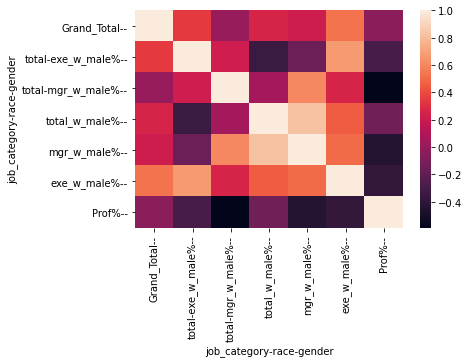

In [29]:
sns.heatmap(df13.corr())

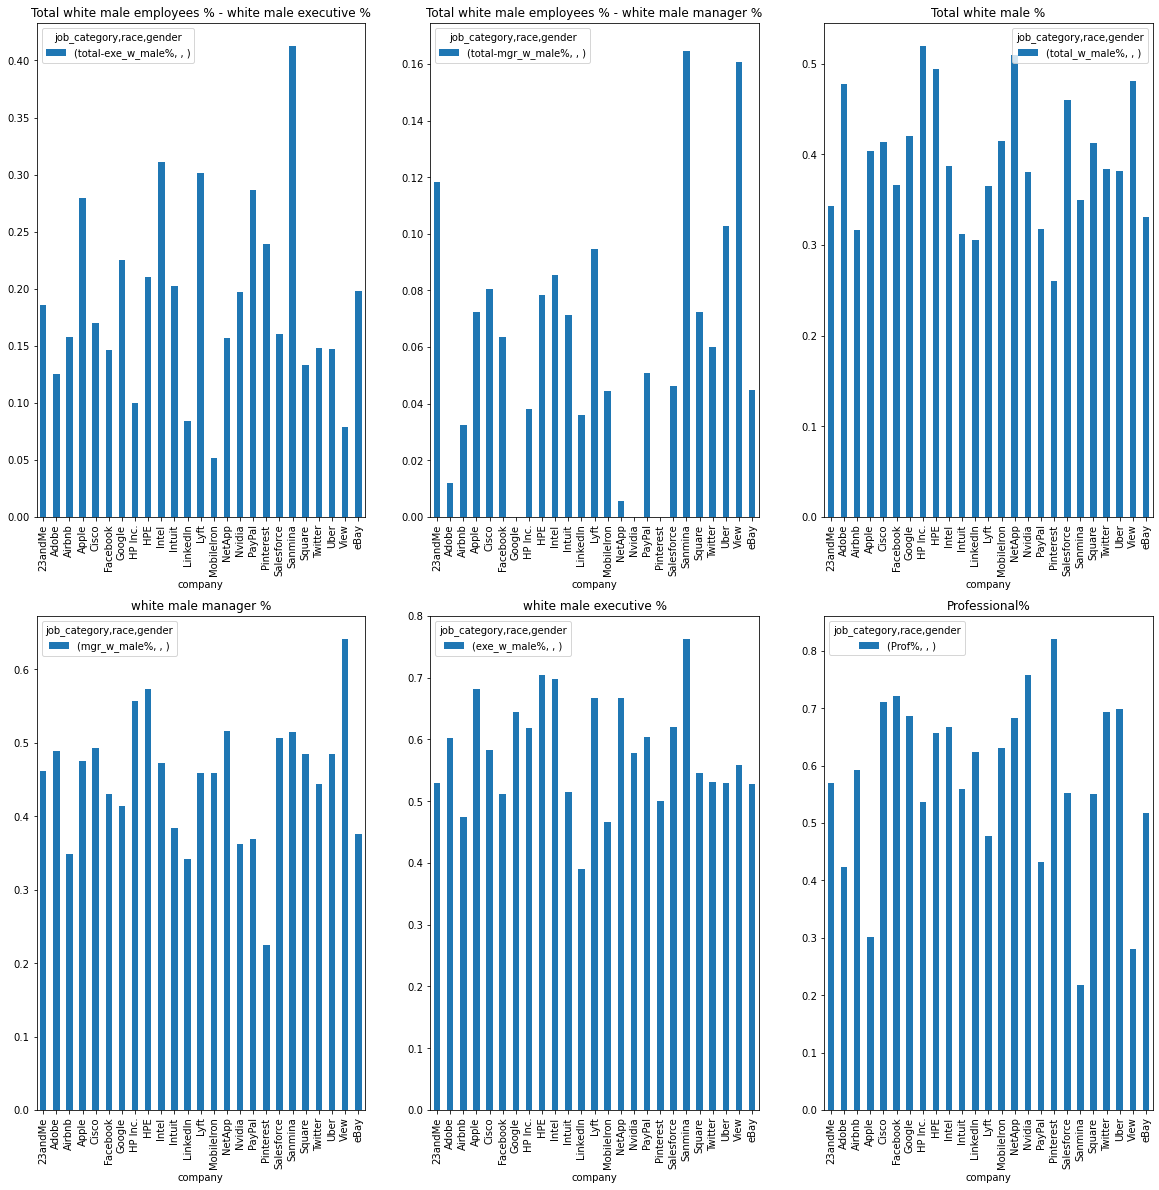

In [30]:
cargs = {'kind':'bar', 'use_index':True, 'ylim': (0,None), 'rot':90}

args_list = [
    {'title': 'Total white male employees % - white male executive %', 'column':['total-exe_w_male%']},
    {'title': 'Total white male employees % - white male manager %', 'column':['total-mgr_w_male%']},
    {'title': 'Total white male %', 'column': ['total_w_male%']},
    {'title': 'white male manager %', 'column': ['mgr_w_male%']},
    {'title': 'white male executive %', 'column': ['exe_w_male%']},
    {'title': 'Professional%', 'column': ['Prof%']},
]

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20, 20), sharex=False)

for ax, args in zip(axes.ravel(), args_list):
    df13[args['column']].plot(ax=ax,  **cargs, title=args['title'])

No handles with labels found to put in legend.


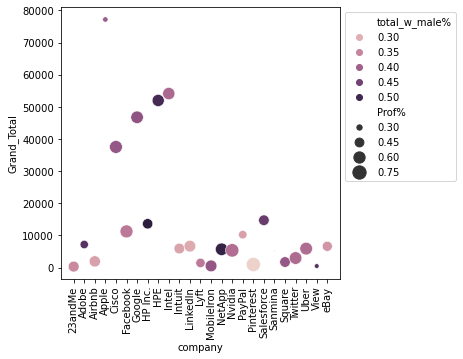

In [31]:
plt.figure(figsize=(5, 5))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df13.index,y=df13['Grand_Total'],hue=df13['total_w_male%'],size=df13['Prof%'],data=df13,sizes=(1,200))
plt.xticks(rotation=90)
ax.legend(loc='upper left',bbox_to_anchor=(1,1))

No handles with labels found to put in legend.


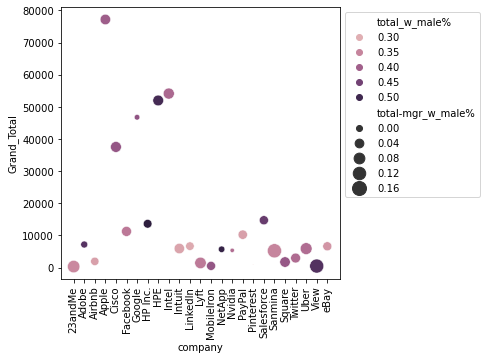

In [32]:
plt.figure(figsize=(5, 5))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df13.index,y=df13['Grand_Total'],hue=df13['total_w_male%'],size=df13['total-mgr_w_male%'],data=df13,sizes=(1,200))
plt.xticks(rotation=90)
ax.legend(loc='upper left',bbox_to_anchor=(1,1))

No handles with labels found to put in legend.


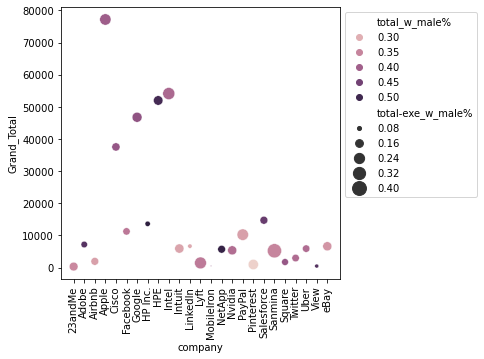

In [33]:
plt.figure(figsize=(5, 5))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df13.index,y=df13['Grand_Total'],hue=df13['total_w_male%'],size=df13['total-exe_w_male%'],data=df13,sizes=(1,200))
plt.xticks(rotation=90)
ax.legend(loc='upper left',bbox_to_anchor=(1,1))

<AxesSubplot:xlabel='company'>

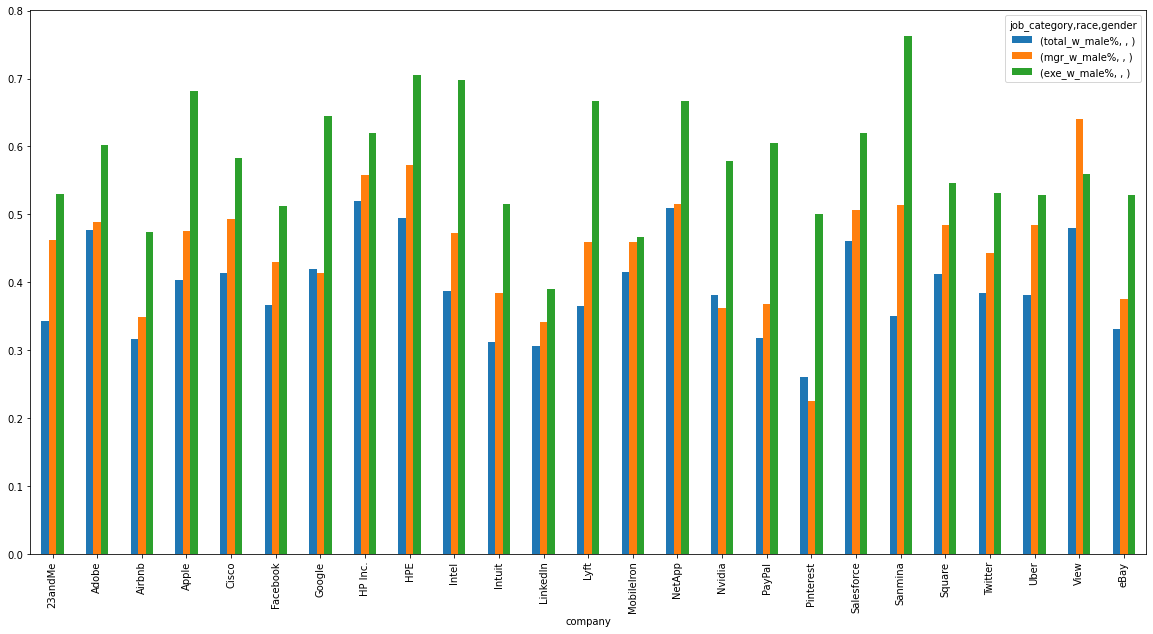

In [34]:
df13.plot.bar(y=['total_w_male%','mgr_w_male%','exe_w_male%'],figsize=(20,10))

# Clustering

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [36]:
sc = StandardScaler()
clustering_sc = sc.fit_transform(df13)

In [37]:
pred = KMeans(n_clusters=4).fit_predict(clustering_sc)

In [38]:
pred

array([0, 3, 0, 2, 2, 0, 2, 3, 2, 2, 0, 0, 1, 0, 3, 0, 0, 0, 3, 1, 3, 0,
       0, 3, 0])

In [39]:
df13['cluster']=pred
df13['cluster'].value_counts()

0    12
3     6
2     5
1     2
Name: cluster, dtype: int64

In [40]:
df13

job_category,Grand_Total,total-exe_w_male%,total-mgr_w_male%,total_w_male%,mgr_w_male%,exe_w_male%,Prof%,cluster
race,,,,,,,,
gender,,,,,,,,
company,,,,,,,,
23andMe,297,0.185977,0.118104,0.343434,0.461538,0.529412,0.569024,0
Adobe,7162,0.125189,0.012009,0.476962,0.488971,0.602151,0.422787,3
Airbnb,1917,0.157586,0.032512,0.316641,0.349153,0.474227,0.592071,0
Apple,77192,0.279079,0.072522,0.403164,0.475686,0.682243,0.300549,2
Cisco,37526,0.169962,0.080392,0.413100,0.493493,0.583062,0.710467,2
Facebook,11241,0.145848,0.063473,0.366249,0.429721,0.512097,0.721555,0
Google,46760,0.225465,-0.005646,0.419696,0.414050,0.645161,0.686313,2


# PCA

In [41]:
import sklearn
from sklearn.decomposition import PCA

In [43]:
df14=df13.drop('cluster', axis=1)

In [44]:
df14


job_category,Grand_Total,total-exe_w_male%,total-mgr_w_male%,total_w_male%,mgr_w_male%,exe_w_male%,Prof%
race,,,,,,,
gender,,,,,,,
company,,,,,,,
23andMe,297,0.185977,0.118104,0.343434,0.461538,0.529412,0.569024
Adobe,7162,0.125189,0.012009,0.476962,0.488971,0.602151,0.422787
Airbnb,1917,0.157586,0.032512,0.316641,0.349153,0.474227,0.592071
Apple,77192,0.279079,0.072522,0.403164,0.475686,0.682243,0.300549
Cisco,37526,0.169962,0.080392,0.413100,0.493493,0.583062,0.710467
Facebook,11241,0.145848,0.063473,0.366249,0.429721,0.512097,0.721555
Google,46760,0.225465,-0.005646,0.419696,0.414050,0.645161,0.686313


In [45]:
pca = PCA()
pca.fit(clustering_sc)
feature = pca.transform(clustering_sc)

In [46]:
df15=pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(df14.columns))])
df15

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.222743,0.008401,-1.494450,-0.538795,-0.616018,1.101140e-15,1.446713e-15
1,-0.536907,-1.272617,0.304826,1.189828,1.081643,-1.584032e-15,-2.803882e-15
2,2.095711,0.292990,-0.637034,-0.076598,0.467242,-5.255860e-16,-2.763854e-16
3,-2.641975,1.727168,1.000369,-1.094936,1.804310,-9.205518e-16,-1.227087e-15
4,-0.448185,-0.336789,0.854797,-1.146477,-0.525398,1.130046e-15,1.290459e-15
5,1.145067,-0.406061,-0.028882,-0.624587,-0.520075,7.543936e-16,9.784281e-16
6,-0.038090,0.718984,2.305420,-0.029281,0.334547,-5.407557e-16,-4.272231e-16
7,-1.188745,-2.057249,0.742222,0.663741,0.285003,-5.805503e-16,-1.605928e-15
8,-2.439859,-0.415532,1.836651,-0.636222,-0.559610,1.026210e-15,9.816424e-16
9,-1.573455,1.691292,1.385006,-0.900062,-0.708416,1.209489e-15,1.921195e-15


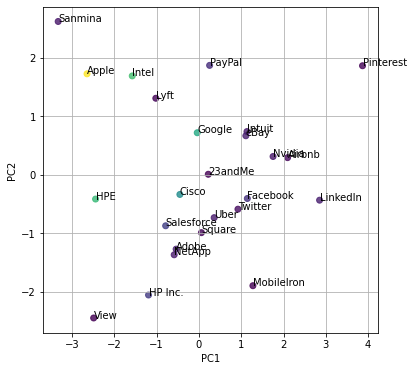

In [47]:
PC1=df15.iloc[:,0]
PC2=df15.iloc[:,1]
annotations=['23andMe', 'Adobe', 'Airbnb', 'Apple', 'Cisco', 'Facebook', 'Google',
       'HP Inc.', 'HPE', 'Intel', 'Intuit', 'LinkedIn', 'Lyft', 'MobileIron',
       'NetApp', 'Nvidia', 'PayPal', 'Pinterest', 'Salesforce', 'Sanmina',
       'Square', 'Twitter', 'Uber', 'View', 'eBay']
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df14.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
for i, label in enumerate(annotations):
    plt.annotate(label, (PC1[i], PC2[i]))

plt.show()

In [48]:
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(df14.columns))])

,0
PC1,4.208275e-01
PC2,2.497728e-01
PC3,1.965415e-01
PC4,7.428172e-02
PC5,5.857653e-02
PC6,2.541910e-33
PC7,2.303152e-33


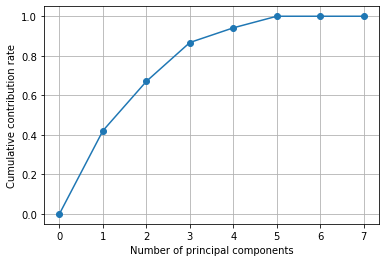

In [49]:
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [50]:
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(df14.columns))])

,0
PC1,3.068534e+00
PC2,1.821260e+00
PC3,1.433115e+00
PC4,5.416375e-01
PC5,4.271205e-01
PC6,1.853476e-32
PC7,1.679382e-32


In [51]:
pd.DataFrame(pca.components_, columns=df13.columns[1:], index=["PC{}".format(x + 1) for x in range(len(df14.columns))])

job_category,total-exe_w_male%,total-mgr_w_male%,total_w_male%,mgr_w_male%,exe_w_male%,Prof%,cluster
race,,,,,,,
gender,,,,,,,
PC1,-0.277326,-0.210780,-0.367374,-0.358336,-0.491200,-0.482332,3.759948e-01
PC2,0.219774,0.687011,0.016310,-0.501965,-0.390636,0.255663,-9.757849e-02
PC3,0.538472,0.017427,-0.550954,0.327422,-0.047899,0.274638,4.703913e-01
PC4,-0.676235,0.198548,-0.486716,0.254111,-0.070296,0.388571,-2.142236e-01
PC5,0.357132,-0.236776,-0.386208,0.018127,-0.201930,-0.210204,-7.628543e-01
PC6,0.000000,-0.078605,-0.383204,-0.610112,0.684008,0.082905,7.554093e-16
PC7,-0.000000,-0.617755,0.168301,-0.274381,-0.300413,0.651552,1.082078e-15


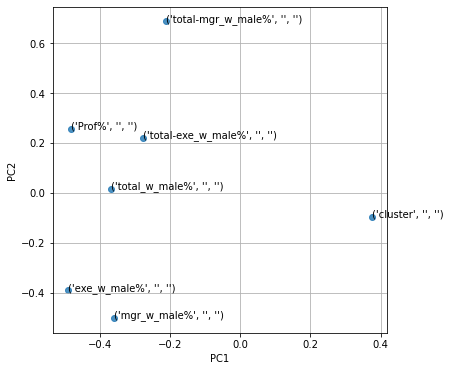

In [52]:
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], df13.columns[1:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()